In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

# Наивный Байес 

## Categorical features

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["play_tennis.csv"]), index_col="day")
data # Игрушечный датасет бинарной классификации с категориальными фичами

Saving play_tennis.csv to play_tennis.csv


,outlook,temp,humidity,wind,play
day,,,,,
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes
D6,Rain,Cool,Normal,Strong,No
D7,Overcast,Cool,Normal,Strong,Yes
D8,Sunny,Mild,High,Weak,No
D9,Sunny,Cool,Normal,Weak,Yes


In [ ]:
X_test = pd.DataFrame([["Rain", "Cool", "Normal", "Strong"]], columns=('outlook', 'temp', 'humidity', 'wind'))

Наивный Байесовский классификатор - вероятностная модель, делающая предположение, что фичи независимы между собой, в отличие от Оптимального Байесовсого классификатор.  
P(y|x) = p(x1|y) * p(x2|y)*...* p(xn|y) * p(y)

In [ ]:
ans = []
results = ['No', 'Yes'] # target 2 типов
for X_test in data.values:
    print(X_test)
    prob = [] # для финальных вероятностей
    for target in results:
        #print("###{}###".format(target))
        sub_data = data[data["play"] == target] # Выбираем данные по таргетам
        #print()
        #print(sub_data)
        #print()
        p_y = sub_data.shape[0] / data.shape[0]
        for i, col in enumerate(sub_data.columns[:-1]): # пробегаем по каждой колонке
            # вычисляем вероятности по каждой колонке + сглаживание 
            tmp = ((np.sum(sub_data[[col]] == X_test[i]) + 1) / (sub_data.shape[0] + data[col].unique().shape[0])).values
            #print("{} --- prob: {}".format(col, tmp))
            p_y *= tmp
        #print()
        prob.append(p_y)
    idx = np.argmax(prob) # индекс наивероятнейшего события
    print("Probabilities: {}".format(prob))
    print("Result: {}".format(results[idx]))
    ans.append(results[idx])
print()
print("FINALY: ", np.sum(np.array(ans) == data.play.values)/ data.shape[0] * 100,"%")


['Sunny' 'Hot' 'High' 'Weak' 'No']
Probabilities: [array([0.02049927]), array([0.00929752])]
Result: No
['Sunny' 'Hot' 'High' 'Strong' 'No']
Probabilities: [array([0.02733236]), array([0.00531287])]
Result: No
['Overcast' 'Hot' 'High' 'Weak' 'Yes']
Probabilities: [array([0.00512482]), array([0.01549587])]
Result: Yes
['Rain' 'Mild' 'High' 'Weak' 'Yes']
Probabilities: [array([0.01537445]), array([0.02066116])]
Result: Yes
['Rain' 'Cool' 'Normal' 'Weak' 'Yes']
Probabilities: [array([0.00409985]), array([0.02892562])]
Result: Yes
['Rain' 'Cool' 'Normal' 'Strong' 'No']
Probabilities: [array([0.00546647]), array([0.01652893])]
Result: Yes
['Overcast' 'Cool' 'Normal' 'Strong' 'Yes']
Probabilities: [array([0.00182216]), array([0.02066116])]
Result: Yes
['Sunny' 'Mild' 'High' 'Weak' 'No']
Probabilities: [array([0.02049927]), array([0.01549587])]
Result: No
['Sunny' 'Cool' 'Normal' 'Weak' 'Yes']
Probabilities: [array([0.00546647]), array([0.02169421])]
Result: Yes
['Rain' 'Mild' 'Normal' 'Weak'

## Continuous features

In [96]:
from sklearn import datasets

In [116]:
iris = datasets.load_iris(as_frame=True)

In [117]:
X = iris.data
y = pd.DataFrame(iris.target)

(array([34., 14.,  1.,  1.,  0.,  7.,  8., 13., 20.,  6., 12., 11.,  6.,
        11.,  6.]),
 array([0.1 , 0.26, 0.42, 0.58, 0.74, 0.9 , 1.06, 1.22, 1.38, 1.54, 1.7 ,
        1.86, 2.02, 2.18, 2.34, 2.5 ]),
 <a list of 15 Patch objects>)

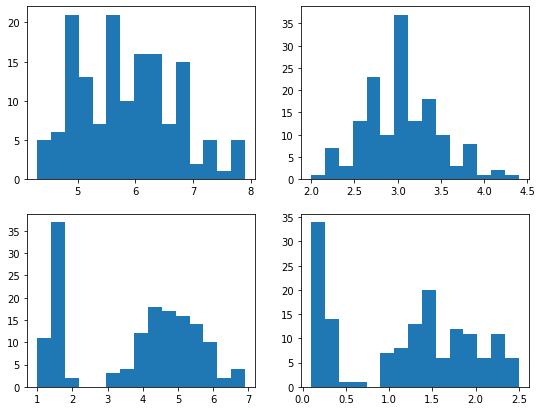

In [99]:
plt.figure(figsize=(9, 7))
plt.subplot(2, 2, 1)
plt.hist(X["sepal length (cm)"], bins=15)
plt.subplot(2, 2, 2)
plt.hist(X["sepal width (cm)"], bins=15)
plt.subplot(2, 2, 3)
plt.hist(X["petal length (cm)"], bins=15)
plt.subplot(2, 2, 4)
plt.hist(X["petal width (cm)"], bins=15)

In [100]:
# В качестве предпологаемого распределения возьмём Нормальное распределение
def normal_distrib(x, m=0, d=1):
    return np.exp(((x - m) ** 2) / (d ** 2) / (-2)) / (d * np.sqrt(2 * np.pi))

In [101]:
res = iris.target_names
for c, x_test in enumerate(X.values):
    prob = []
    for flower, f_n in zip(iris.target_names, iris.target.unique()):
        #print("FLOWER: {} --- NUMBER: {}".format(flower, f_n))
        p_y = 1/3
        X_iris = X[y.target == f_n]
        m = X_iris.mean().values
        d = (X_iris.std().values) ** 2
        for x_i, m_i, d_i in zip(x_test, m, d):
            p_y *= normal_distrib(x_i, m_i, d_i)
        prob.append(p_y)
    #print("Probabilities: {}".format(prob))
    idx = np.argmax(prob)
    print("{}) ANSWER: {}".format(c, res[idx]))

0) ANSWER: setosa
1) ANSWER: setosa
2) ANSWER: setosa
3) ANSWER: setosa
4) ANSWER: setosa
5) ANSWER: setosa
6) ANSWER: setosa
7) ANSWER: setosa
8) ANSWER: setosa
9) ANSWER: setosa
10) ANSWER: setosa
11) ANSWER: setosa
12) ANSWER: setosa
13) ANSWER: setosa
14) ANSWER: setosa
15) ANSWER: setosa
16) ANSWER: setosa
17) ANSWER: setosa
18) ANSWER: setosa
19) ANSWER: setosa
20) ANSWER: setosa
21) ANSWER: setosa
22) ANSWER: setosa
23) ANSWER: setosa
24) ANSWER: setosa
25) ANSWER: setosa
26) ANSWER: setosa
27) ANSWER: setosa
28) ANSWER: setosa
29) ANSWER: setosa
30) ANSWER: setosa
31) ANSWER: setosa
32) ANSWER: setosa
33) ANSWER: setosa
34) ANSWER: setosa
35) ANSWER: setosa
36) ANSWER: setosa
37) ANSWER: setosa
38) ANSWER: setosa
39) ANSWER: setosa
40) ANSWER: setosa
41) ANSWER: setosa
42) ANSWER: setosa
43) ANSWER: versicolor
44) ANSWER: setosa
45) ANSWER: setosa
46) ANSWER: setosa
47) ANSWER: setosa
48) ANSWER: setosa
49) ANSWER: setosa
50) ANSWER: versicolor
51) ANSWER: versicolor
52) ANSWER

## Multinomial features

In [128]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["NationalNames.csv"]), index_col="Id")
data

Saving NationalNames.csv to NationalNames.csv


,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746
...,...,...,...,...
1825429,Zykeem,2014,M,5
1825430,Zymeer,2014,M,5
1825431,Zymiere,2014,M,5


In [129]:
data_names = data[["Name", "Gender"]]
data_names["Name"] = data_names.Name.apply(str.lower)
letters = []
for gender in data_names.Gender.unique():
    dct = {l: 0 for l in 'abcdefghijklmnopqrstuvwxyz'}
    tmp = data_names[data_names['Gender'] == gender]
    for line in tmp.values:
        for l in line[0]:
            dct[l] += 1
    m = sum(dct.values())
    p_y = tmp.shape[0] / data_names.shape[0]
    letters.append((dct, m, p_y, gender))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [134]:
ans = []
for name_test in data_names.Name.values:
    prob = []
    for theta, n_m, prob_gender, gender in letters:
        tmp = prob_gender
        for l in name_test:
            if gender == "F":
                tmp *= theta[l] / (n_m + 3000 * 26)
            else:
                tmp *= (theta[l] + 3000) / (n_m + 3000 * 26)
        prob.append(tmp)
    idx = np.argmax(prob)
    if idx == 0:
        ans.append('F')
    else:
        ans.append('M')
print(sum(np.array(ans) == data_names["Gender"].values)/1825433 * 100)

66.95304620876253
